In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn import preprocessing as pre
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [3]:
def dataset():
    data = pd.read_csv('final-dataset.csv')
    X = data.drop(columns=['Signal','Label','Hurst Component'])
    y = data['Label']
    feature_names = X.columns
    return X, y, feature_names

In [4]:
parameters = {'C':range(1,10)}

In [5]:
def get_feature_names(selector, feature_names):
    mask = selector.get_support() #list of booleans
    new_features = [] # The list of your K best features
    for bool, feature in zip(mask, feature_names):
        if bool:
            new_features.append(feature)
    return new_features

In [6]:
def feature_scaling_min_max(X):
    min_max_scaler = pre.MinMaxScaler()
    X = min_max_scaler.fit_transform(X)
    return X

In [7]:
from sklearn.metrics import confusion_matrix
def performance_measures(x_test, y_test):
    y_true = y_test
    y_pred = clf.predict(x_test)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp + fn)
    return sensitivity, specificity

In [8]:
def feature_scaling_basic(X):
    return pre.scale(X)

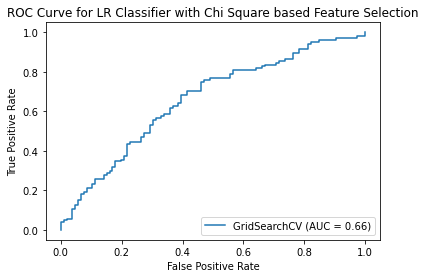

In [17]:
import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection, svm

X, y, feature_names = dataset()
X = feature_scaling_min_max(X)
selector = SelectKBest(chi2, k=3)
X_new = selector.fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
clf = LogisticRegression(random_state=0, max_iter=1000, solver='liblinear', penalty='l1')
clf = GridSearchCV(clf, parameters)
clf.fit(X_train, y_train)
metrics.plot_roc_curve(clf, x_test, y_test) 
plt.title("ROC Curve for LR Classifier with Chi Square based Feature Selection")
plt.show()  

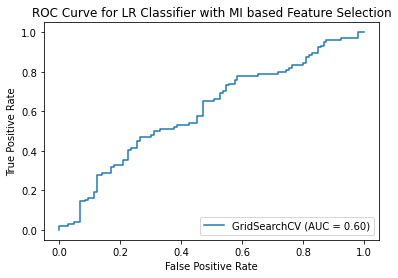

In [15]:
import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection, svm

X, y, feature_names = dataset()
X = feature_scaling_min_max(X)
selector = SelectKBest(mutual_info_classif, k=8)
X_new = selector.fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
clf = LogisticRegression(random_state=0, max_iter=1000, solver='liblinear', penalty='l1')
clf = GridSearchCV(clf, parameters)
clf.fit(X_train, y_train)
metrics.plot_roc_curve(clf, x_test, y_test) 
plt.title("ROC Curve for LR Classifier with MI based Feature Selection")
plt.show()  

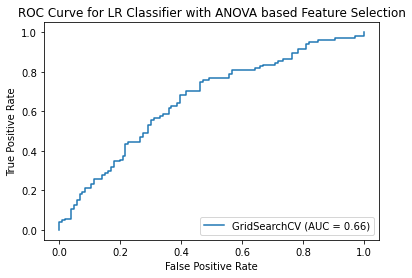

In [12]:
import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection, svm

X, y, feature_names = dataset()
X = feature_scaling_min_max(X)
selector = SelectKBest(f_classif, k=2)
X_new = selector.fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
clf = LogisticRegression(random_state=0, max_iter=1000, solver='liblinear', penalty='l1')
clf = GridSearchCV(clf, parameters)
clf.fit(X_train, y_train)
metrics.plot_roc_curve(clf, x_test, y_test) 
plt.title("ROC Curve for LR Classifier with ANOVA based Feature Selection")
plt.show()  

In [8]:
max_score = 0
best_params = {}
best_k = 2
best_sensitivity = 0
best_specificity = 0
best_val_score = 0
selected_names = []

for k in range(2,10):
    X, y, feature_names = dataset()
    X = feature_scaling_min_max(X)
    selector = SelectKBest(chi2, k=k)
    X_new = selector.fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
    x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
    clf = LogisticRegression(random_state=0, max_iter=1000, solver='liblinear', penalty='l1')
    clf = GridSearchCV(clf, parameters)
    clf.fit(X_train, y_train)
    val_score = clf.score(x_val, y_val)
    names = get_feature_names(selector, feature_names)
    sensitivity, specificity = performance_measures(x_test, y_test)
    score = clf.score(x_test, y_test)
    if(score > max_score):
        max_score = score
        best_k = k
        best_params = clf.best_params_
        best_val_score = val_score
        selected_names = names
        best_sensitivity = sensitivity
        best_specificity = specificity
    print("Passed ", k)

print("Test Score is ", max_score)
print("Best params are ", best_params)
print("Best k is ", best_k)
print("Val score is ", best_val_score)
print("Sensitivity ", sensitivity)
print("Specificity ", specificity)
print("names are ", selected_names)

Passed  2
Passed  3
Passed  4
Passed  5
Passed  6
Passed  7
Passed  8
Passed  9
Test Score is  0.6142857142857143
Best params are  {'C': 1}
Best k is  3
Val score is  0.5952380952380952
Sensitivity  0.7019230769230769
Specificity  0.5283018867924528
names are  ['Zero Crossings', 'Frequency (Hz)', 'Hjorth Mobility']


In [9]:
max_score = 0
best_params = {}
best_k = 2
best_val_score = 0

for k in range(2,10):
    X, y, feature_names = dataset()
    X = feature_scaling_min_max(X)
    selector = SelectKBest(f_classif, k=k)
    X_new = selector.fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
    x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
    clf = LogisticRegression(random_state=0, max_iter=1000, solver='liblinear', penalty='l1')
    clf = GridSearchCV(clf, parameters)
    clf.fit(X_train, y_train)
    val_score = clf.score(x_val, y_val)
    names = get_feature_names(selector, feature_names)
    score = clf.score(x_test, y_test)
    sensitivity, specificity = performance_measures(x_test, y_test)
    if(score > max_score):
        max_score = score
        best_k = k
        best_params = clf.best_params_
        best_val_score = val_score
        selected_names = names
        best_sensitivity = sensitivity
        best_specificity = specificity
    print("passed ", k)

print("Test Score is ", max_score)
print("Best params are ", best_params)
print("Best k is ", best_k)
print("Val score is ", best_val_score)
print("Sensitivity ", sensitivity)
print("Specificity ", specificity)
print("names are ", selected_names)

passed  2
passed  3
passed  4
passed  5
passed  6
passed  7
passed  8
passed  9
Test Score is  0.6142857142857143
Best params are  {'C': 1}
Best k is  2
Val score is  0.5952380952380952
Sensitivity  0.7019230769230769
Specificity  0.5283018867924528
names are  ['Frequency (Hz)', 'Hjorth Mobility']


In [10]:
max_score = 0
best_params = {}
best_k = 2
best_val_score = 0

for k in range(2,10):
    X, y, feature_names = dataset()
    X = feature_scaling_min_max(X)
    selector = SelectKBest(mutual_info_classif, k=k)
    X_new = selector.fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
    x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
    clf = LogisticRegression(random_state=0, max_iter=1000, solver='liblinear', penalty='l1')
    clf = GridSearchCV(clf, parameters)
    clf.fit(X_train, y_train)
    val_score = clf.score(x_val, y_val)
    names = get_feature_names(selector, feature_names)
    sensitivity, specificity = performance_measures(x_test, y_test)
    score = clf.score(x_test, y_test)
    if(score > max_score):
        max_score = score
        best_k = k
        best_params = clf.best_params_
        best_val_score = val_score
        selected_names = names
        best_sensitivity = sensitivity
        best_specificity = specificity
        selected_names = names
    print("passed ", k)

print("Test Score is ", max_score)
print("Best params are ", best_params)
print("Best k is ", best_k)
print("Val score is ", best_val_score)
print("Sensitivity ", sensitivity)
print("Specificity ", specificity)
print("names are ", selected_names)

passed  2
passed  3
passed  4
passed  5
passed  6
passed  7
passed  8
passed  9
Test Score is  0.5904761904761905
Best params are  {'C': 7}
Best k is  8
Val score is  0.5476190476190477
Sensitivity  0.6826923076923077
Specificity  0.3584905660377358
names are  ['RMS (µV)', 'Zero Crossings', 'Delta (µV² /Hz)', 'Theta (µV² /Hz)', 'Alpha (µV² /Hz)', 'Beta (µV² /Hz)', 'Gamma (µV² /Hz)', 'Variance']
